<a href="https://colab.research.google.com/github/davidofitaly/08_decetion_anomaly_projects/blob/main/01_exploring_anomalies_in_simulated_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Table of contents:
1. [Import of libraries](#0)
2. [Data generation](#1)
3. [Visualization created data](#2)
4. [Local Outlier Factor](#3)


### <a name='0'> </a> Import of libraries


In [59]:
# Import the necessary libraries
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.0)

# Print the version of the imported libraries for reference
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')
print(f'Seaborn: {sns.__version__}')

Pandas: 2.2.2
Numpy: 1.26.4
Seaborn: 0.13.2


### <a name='1'> </a> Data generation

In [10]:
# Import make_blobs datasets
from sklearn.datasets import make_blobs

raw_data = make_blobs(n_samples=200, centers=2, cluster_std=1.5, center_box=(-10,10), random_state=42)[0]

raw_data[:5]

array([[ 2.24823735,  1.07410715],
       [ 5.12395668,  0.73232327],
       [ 4.6766441 ,  2.72016712],
       [-4.10265319,  9.72467477],
       [ 5.06136664,  1.0391204 ]])

In [11]:
# Create DataFrame
df_blobs = pd.DataFrame(raw_data, columns=['x1', 'x2'])
df_blobs.head()

,x1,x2
0,2.248237,1.074107
1,5.123957,0.732323
2,4.676644,2.720167
3,-4.102653,9.724675
4,5.061367,1.039120


### <a name='2'> </a> Visualization created data

In [12]:
# Create a scatter plot to visualize the clustering of the data points
px.scatter(df_blobs, 'x1', 'x2', width=1000, height=500, title='Visualization of the generated data', template='ggplot2')

### <a name='3'> </a> Local Outlier Factor

- algorithm

In [18]:
from sklearn.neighbors import LocalOutlierFactor


lof = LocalOutlierFactor(n_neighbors=20)
outliers = lof.fit_predict(df_blobs)

outliers[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
df_blobs['outliers'] = outliers

df_blobs.head()

,x1,x2,outliers
0,2.248237,1.074107,1
1,5.123957,0.732323,1
2,4.676644,2.720167,1
3,-4.102653,9.724675,1
4,5.061367,1.039120,1


In [22]:
px.scatter(df_blobs, x='x1', y='x2', color='outliers', width=1000, title='Local Outlier Factor', template='ggplot2')

- lof scores

In [28]:
lof_scores = lof.negative_outlier_factor_

df_blobs['lof_score'] = lof_scores

df_blobs[['lof_score', 'outliers']].head()

,lof_score,outliers
0,-1.248197,1
1,-0.997708,1
2,-0.968574,1
3,-1.032313,1
4,-0.985942,1


In [36]:
radius = (lof_scores.max() - lof_scores) / (lof_scores.max() - lof_scores.min())

radius[:10]

array([0.14867447, 0.0318962 , 0.01831389, 0.04802904, 0.02641072,
       0.2442977 , 0.03180897, 0.04508798, 0.02929635, 0.03017406])

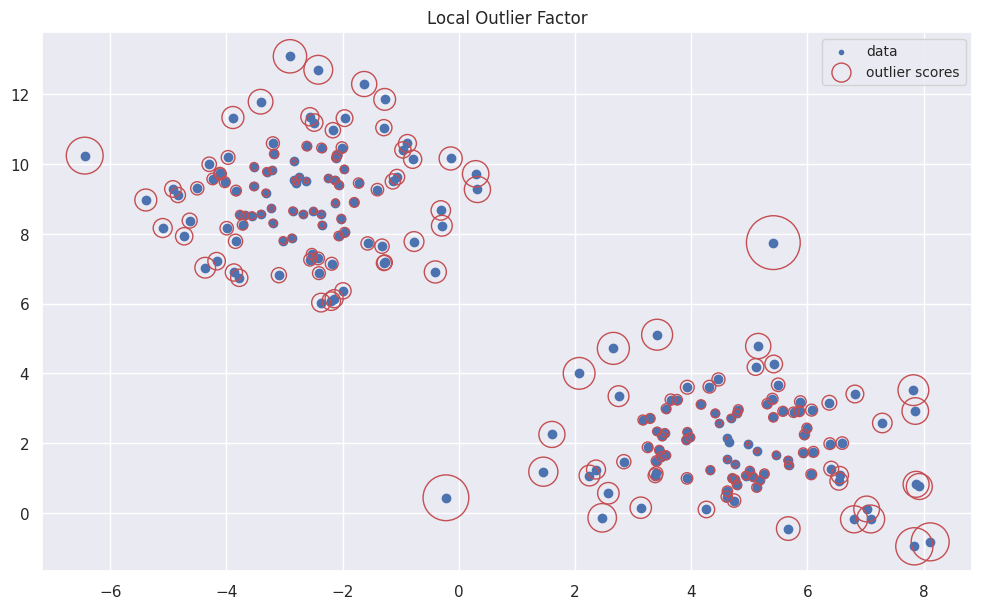

In [62]:
plt.figure(figsize=(12,7))
plt.scatter(df_blobs['x1'], df_blobs['x2'], label='data')
plt.scatter(df_blobs['x1'], df_blobs['x2'], s = 1500 * radius, edgecolors='r', facecolors='none', label='outlier scores')
plt.title('Local Outlier Factor')
plt.legend()
legend = plt.legend(scatterpoints=1, loc='best', fontsize='small', markerscale=0.5)
plt.show()